In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ticker_df = pd.read_csv('ticker_data.csv')
factor_df = pd.read_csv('factor_data.csv')

In [7]:
print(factor_df.head())

         VIX       COPP      3M_R    US_TRY      BIG_IX    SMALL_IX  \
0  15.000000  90.000000  0.060000  0.270000  100.000000  100.000000   
1  14.458574  98.095646  0.060474  0.269558   99.595377   99.623765   
2  14.023697  91.706222  0.060615  0.269159   99.208056   99.249246   
3  14.429497  85.731487  0.060333  0.264040   99.780371   99.628927   
4  14.818531  93.597128  0.060188  0.260119  100.401161  100.195401   

       SENTI       TEMP      RAIN        OIL  timestep  
0  80.000000  74.819656  0.639413  65.000000         0  
1  79.035163  72.808788  0.173868  72.594727         1  
2  78.287603  73.285432  0.814486  67.663561         2  
3  79.847429  79.046248  0.400980  79.658158         3  
4  80.655441  76.964039  0.754570  77.026123         4  


[[ -4.83068533e-03   8.48423989e-04  -9.92606936e-04 ...,  -1.70451981e-03
    3.25517414e-03  -5.97176935e-03]
 [ -5.41588527e-03  -3.04222807e-03   3.25832470e-03 ...,   2.79797770e-03
    5.87573528e-04  -1.17954002e-03]
 [ -4.46111946e-03   2.58925473e-03   7.61043011e-05 ...,   1.24840689e-03
    2.85950748e-04  -1.96547047e-03]
 ..., 
 [ -7.08007717e-03  -4.31203545e-03   2.65355258e-03 ...,   3.59270055e-03
   -3.63960090e-03  -2.24617933e-04]
 [  1.43732312e-04   4.58733391e-03  -1.79964679e-03 ...,   6.61220789e-03
   -8.44744426e-04   9.00163639e-04]
 [ -2.36380226e-03  -6.13867234e-04   4.65107293e-03 ...,   1.30121839e-03
    1.78438013e-03   5.33601618e-03]]


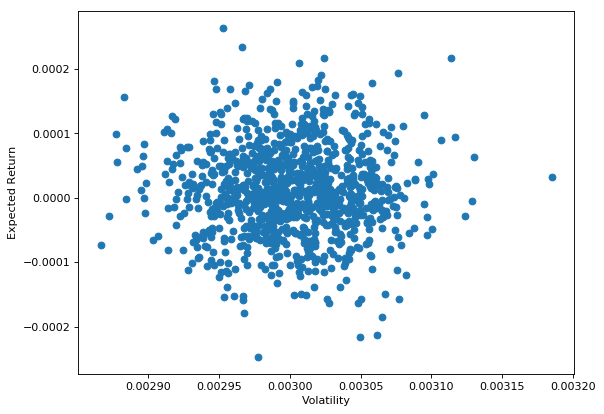

In [36]:
ticker_df = ticker_df.sort_values(by=['ticker','timestep'])

#tick_dict = {}
#keys = np.arange(0,1001,1)


mean = []
stdev = []

return_array = np.zeros((2519,1000))
z = 0

for i in range(1,2520000,2520):
    return_array[:,z] = ticker_df['returns'][i:i+2519]
    z += 1
    mean.append(ticker_df['returns'][i:i+2519].mean())
    stdev.append(ticker_df['returns'][i:i+2519].std())
    
#print(mean)
#print(stdev)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(ticker_df['timestep'][:2520],ticker_df['returns'][:2520])

#print(ticker_df.head())

plt.plot(stdev,mean,'o')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')

print(return_array)

In [ ]:
def rand_weights(n):
    k = np.random.rand(n)
    return k/sum(k)

In [56]:
def random_portfolio(returns):
    '''Returns the mean and standard deviation of returns'''
    
    p = np.asmatrix(np.mean(returns,axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
        
    mu = w*p.T
    sigma = np.sqrt(w*C*w.T)
    
    return mu, sigma

In [57]:
return_vec = np.random.randn(4,100)
print(return_vec)

[[ -4.92615642e-01  -1.11243737e-01   1.36976265e+00   1.08325986e+00
   -6.43163530e-01   1.76758470e+00   1.21099343e+00  -1.61047757e+00
   -1.42981573e-01  -2.13573305e+00   1.03280595e+00   4.35302569e-01
    2.00120152e-01  -1.40665949e+00  -1.65451266e+00  -2.92105026e-01
    9.27389062e-01  -3.65847620e-01  -1.48924220e+00   1.24886039e+00
    7.33717033e-01   6.82797766e-01   3.57346069e-02   2.29668784e-01
    6.32103822e-01  -3.16122410e-01  -5.30329897e-01  -1.26638514e+00
   -3.09280345e-01   8.37384835e-01   2.08267069e+00   2.61206887e-01
    1.21021564e-01  -8.34081556e-01  -1.49105888e-01   9.41512291e-01
   -8.09747150e-01   1.61250312e+00   7.32128883e-01   1.84890662e+00
   -8.07891855e-01   8.46611086e-01  -7.39038241e-01  -1.01446938e+00
    8.72645365e-03  -3.73511774e-01  -7.40852360e-02  -1.09841083e+00
   -7.36047287e-01   6.37129053e-01   8.62286948e-01   1.95444744e-01
    5.92977043e-02  -6.14046760e-01  -1.21557180e+00   1.14451901e-01
   -7.50668634e-01  

In [58]:
#array1 = np.array([[1,2],[3,4]])

#print(array1[1,0])

# row then column

3


In [53]:
#array2 = np.zeros((2,4))


#array2[:,1] = [1,2]
#print(array2)


[[ 0.  1.  0.  0.]
 [ 0.  2.  0.  0.]]


In [54]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_array) 
    for _ in range(n_portfolios)
])

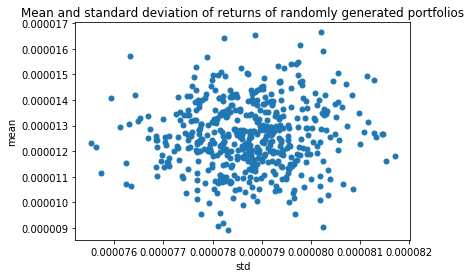

In [55]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
plt.show()